In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64


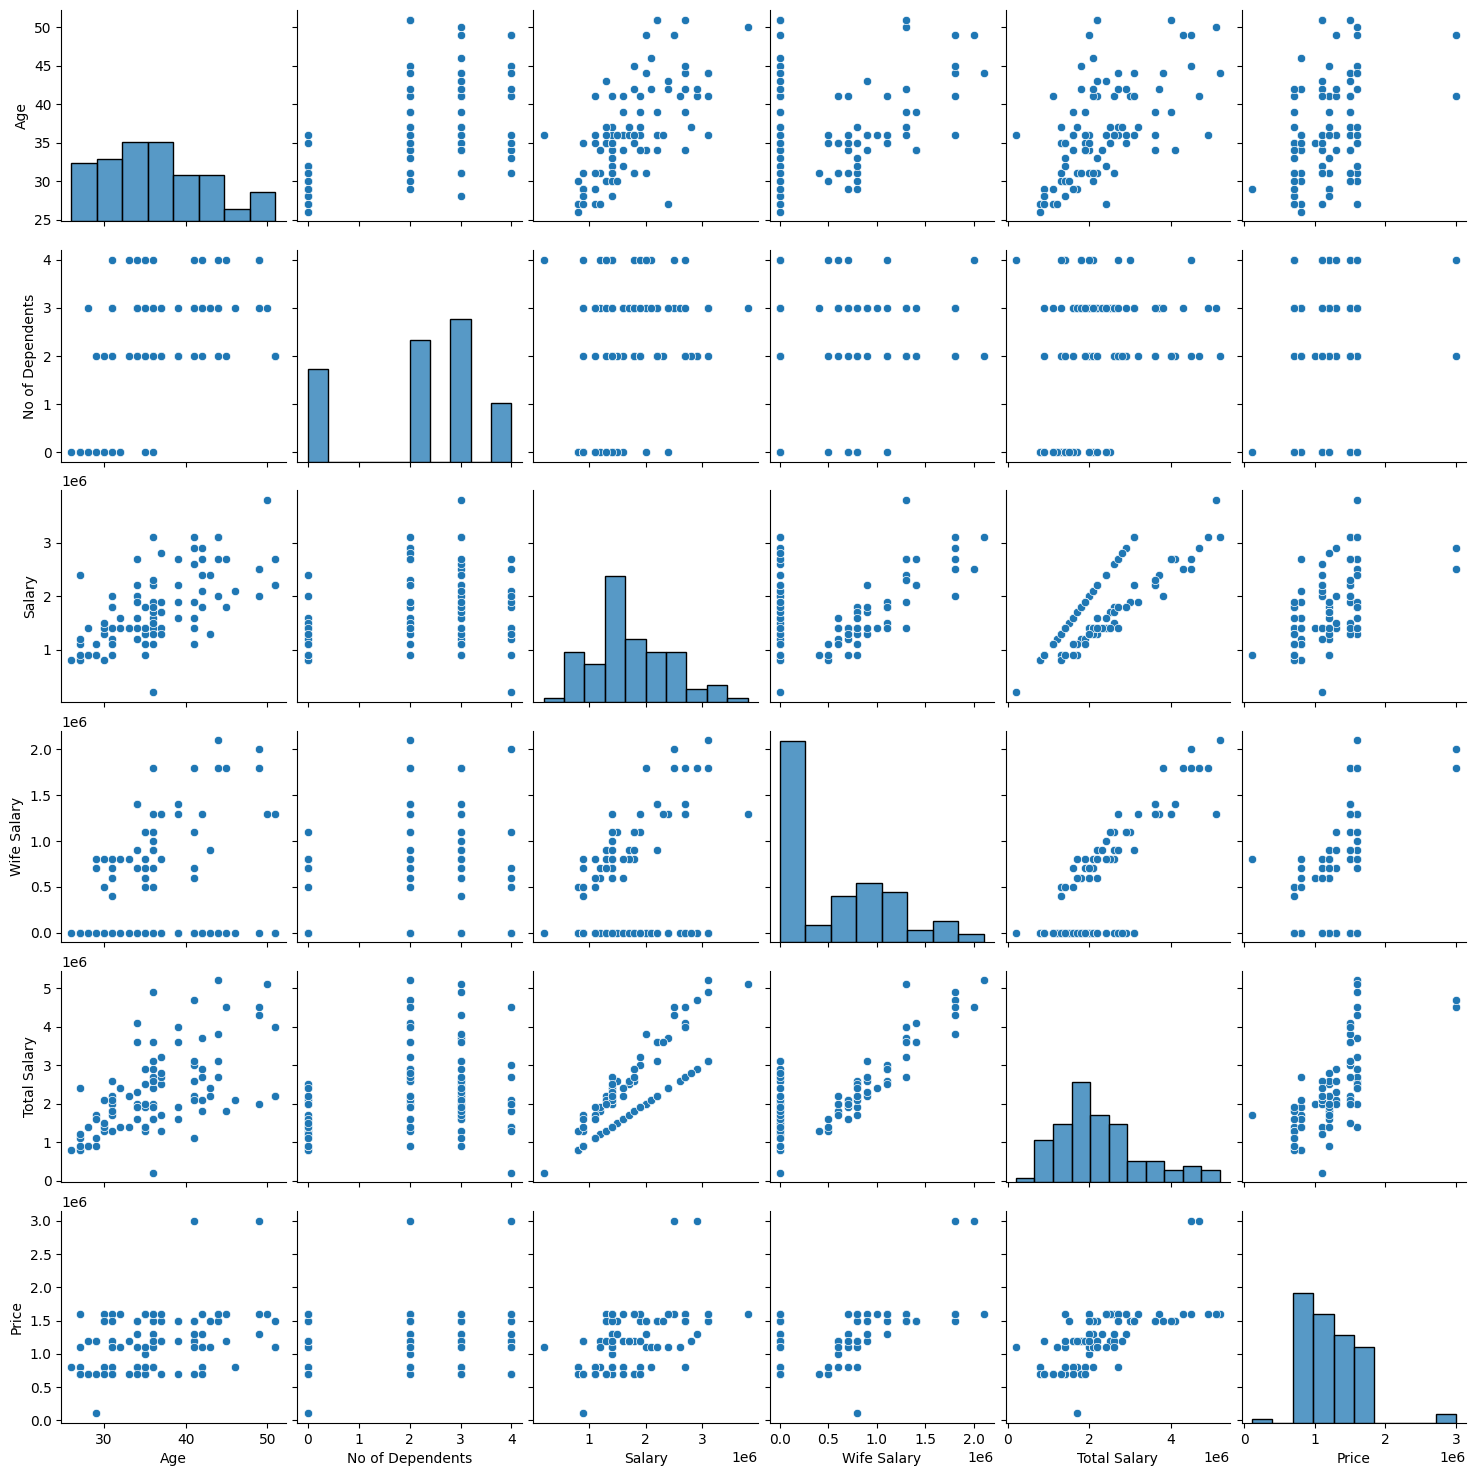

In [8]:
sns.pairplot(df)
plt.show()

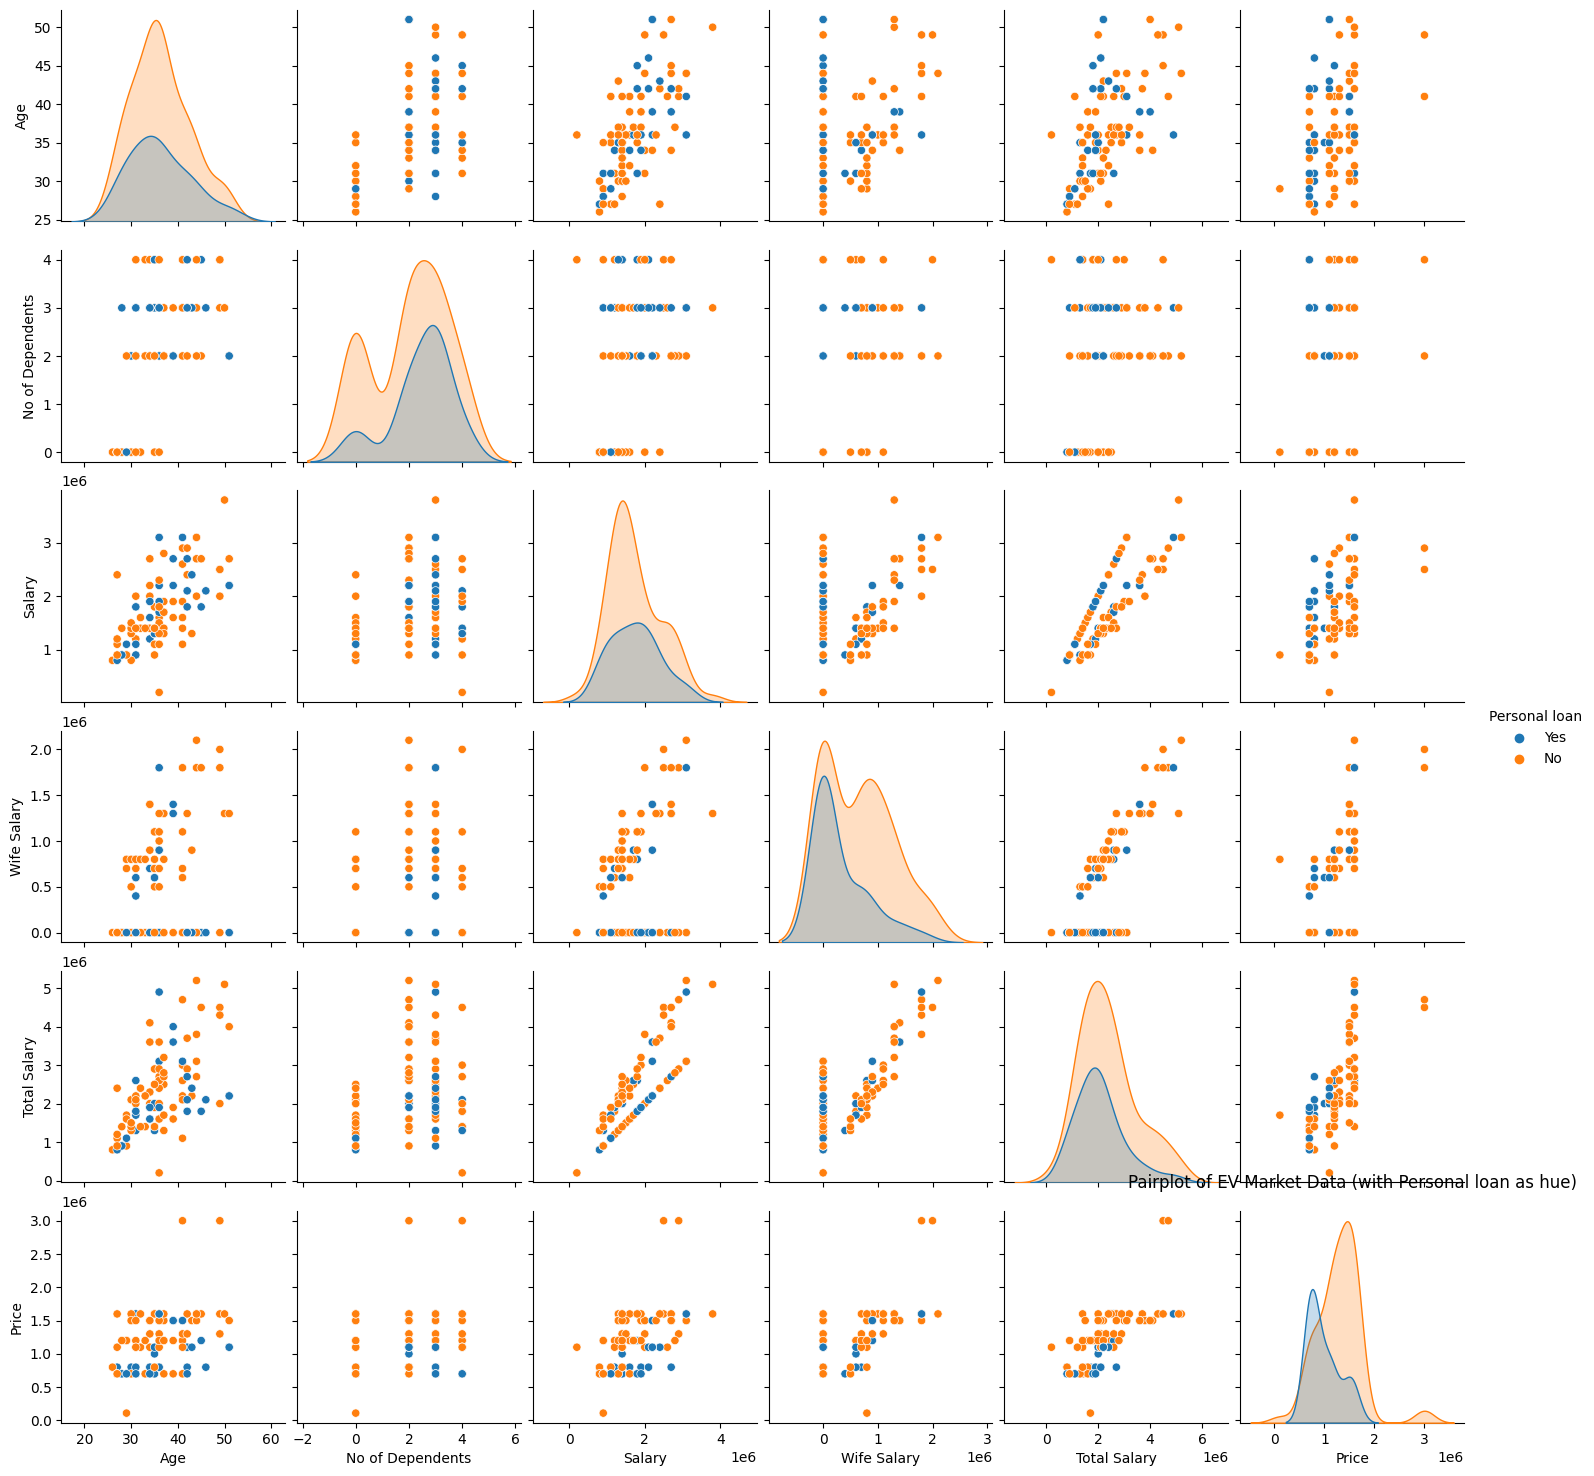

In [9]:
sns.pairplot(df, hue='Personal loan')
plt.title("Pairplot of EV Market Data (with Personal loan as hue)")
plt.show()

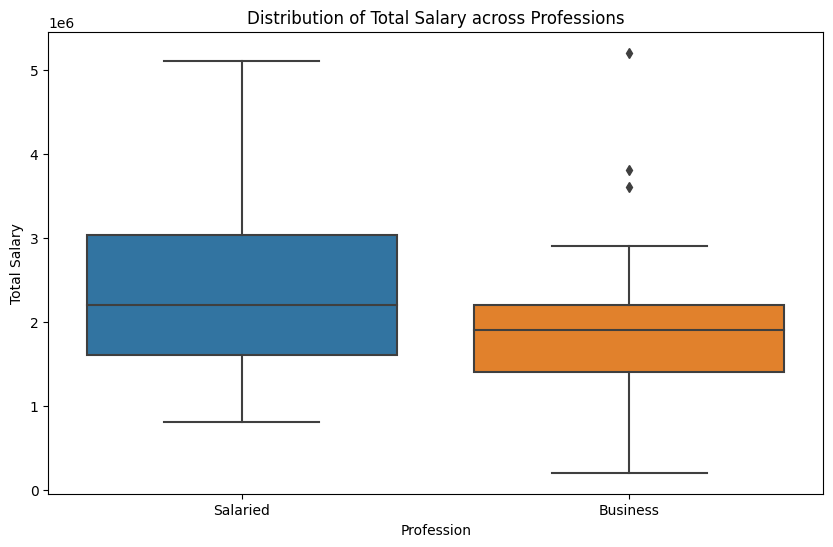

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profession', y='Total Salary', data=df)
plt.title("Distribution of Total Salary across Professions")
plt.show()

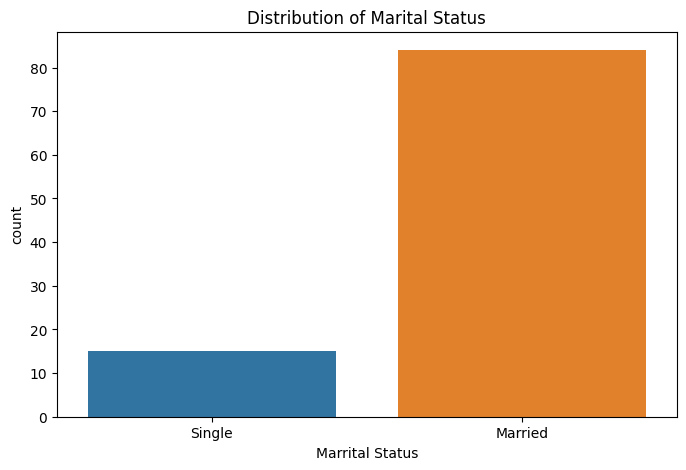

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Marrital Status', data=df)
plt.title("Distribution of Marital Status")
plt.show()

In [20]:
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
              Age  No of Dependents        Salary   Wife Salary  Total Salary  \
count  99.000000         99.000000  9.900000e+01  9.900000e+01  9.900000e+01   
mean   36.313131          2.181818  1.736364e+06  5.343434e+05  2.270707e+06   
std     6.246054          1.335265  6.736217e+05  6.054450e+05  1.050777e+06   
min    26.000000          0.000000  2.000000e+05  0.000000e+00  2.000000e+05   
25%    31.000000          2.000000  1.300000e+06  0.000000e+00  1.550000e+06   
50%    36.000000          2.000000  1.600000e+06  5.000000e+05  2.100000e+06   
75%    41.000000          3.000000  2.200000e+06  9.000000e+05  2.700000e+06   
max    51.000000          4.000000  3.800000e+06  2.100000e+06  5.200000e+06   

              Price  
count  9.900000e+01  
mean   1.194040e+06  
std    4.376955e+05  
min    1.100000e+05  
25%    8.000000e+05  
50%    1.200000e+06  
75%    1.500000e+06  
max    3.000000e+06  


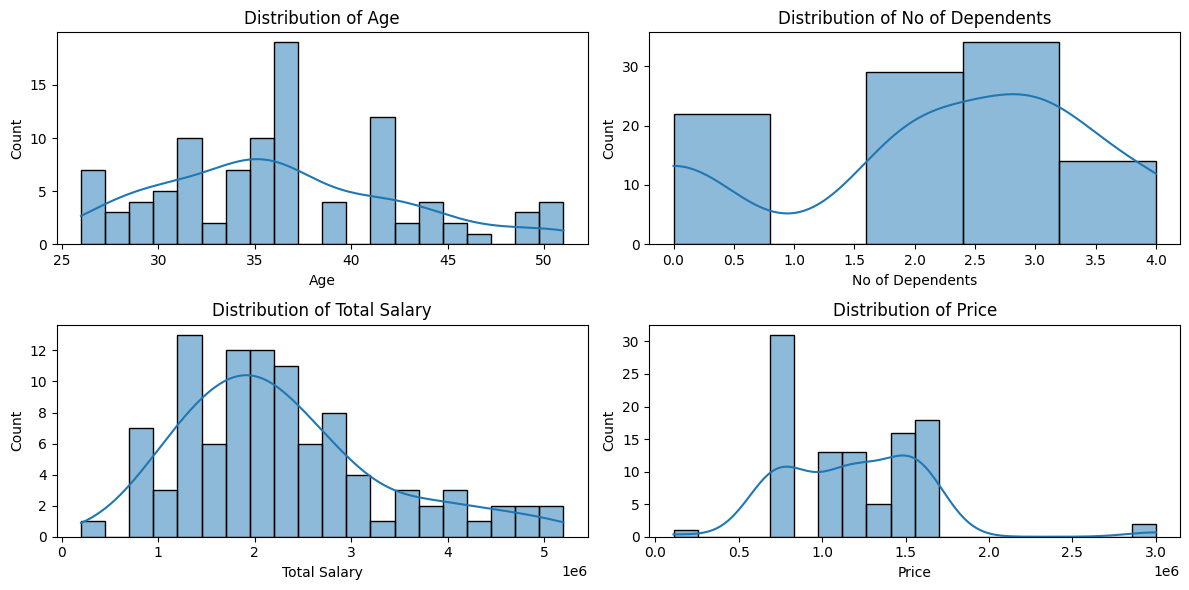

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")

plt.subplot(2, 2, 2)
sns.histplot(df['No of Dependents'], bins=5, kde=True)
plt.title("Distribution of No of Dependents")

plt.subplot(2, 2, 3)
sns.histplot(df['Total Salary'], bins=20, kde=True)
plt.title("Distribution of Total Salary")

plt.subplot(2, 2, 4)
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Distribution of Price")

plt.tight_layout()
plt.show()



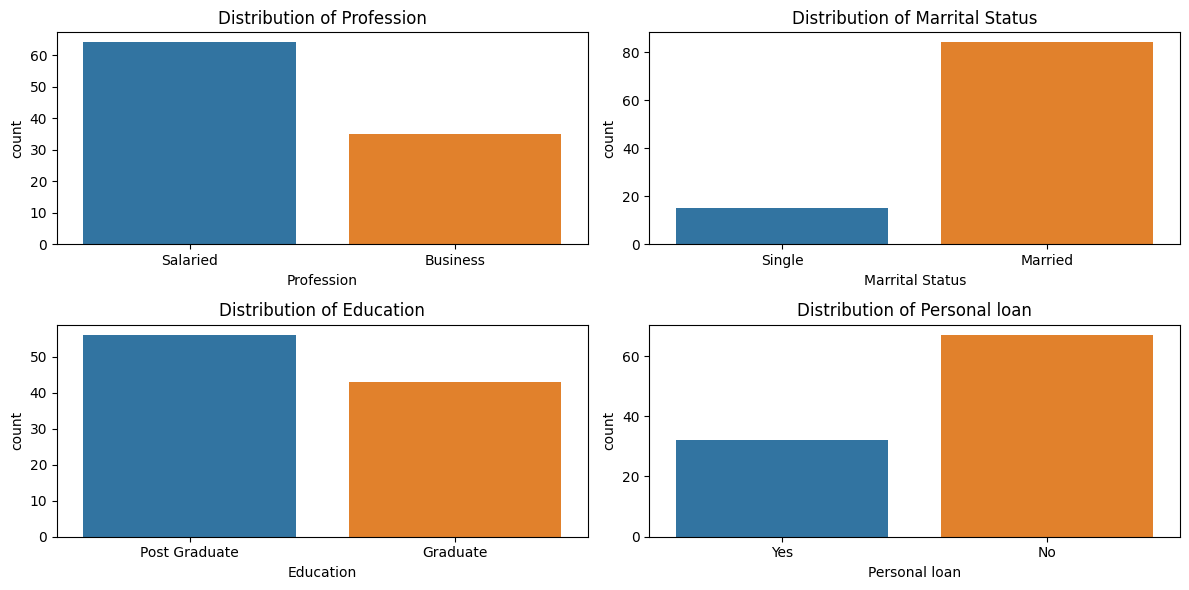

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='Profession', data=df)
plt.title("Distribution of Profession")

plt.subplot(2, 2, 2)
sns.countplot(x='Marrital Status', data=df)
plt.title("Distribution of Marrital Status")

plt.subplot(2, 2, 3)
sns.countplot(x='Education', data=df)
plt.title("Distribution of Education")

plt.subplot(2, 2, 4)
sns.countplot(x='Personal loan', data=df)
plt.title("Distribution of Personal loan")

plt.tight_layout()
plt.show()

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

selected_features = ["Personal loan", "Total Salary"]
segmentation_data = df[selected_features]

In [28]:
segmentation_data = pd.get_dummies(segmentation_data, columns=["Personal loan"], drop_first=True)

scaler = StandardScaler()
segmentation_data_std = scaler.fit_transform(segmentation_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

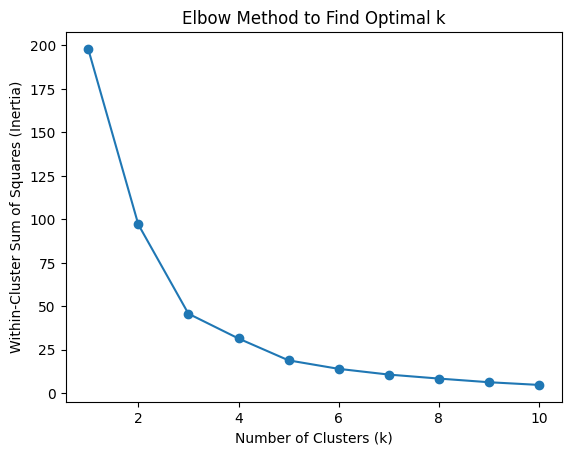

In [31]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmentation_data_std)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method to Find Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


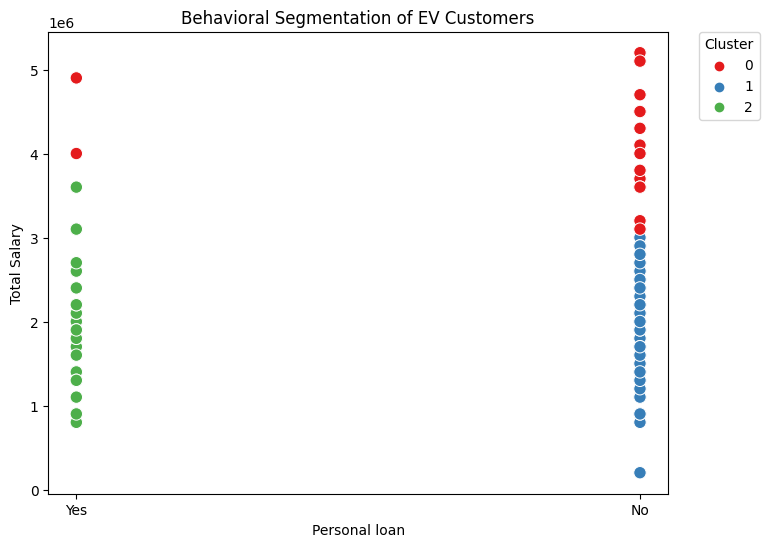

In [32]:
k = 3

# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(segmentation_data_std)

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Visualize the clusters in the 2D space of "Personal loan" and "Total Salary"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Personal loan', y='Total Salary', hue='Cluster', data=df, palette='Set1', s=80)
plt.title('Behavioral Segmentation of EV Customers')
plt.xlabel('Personal loan')
plt.ylabel('Total Salary')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

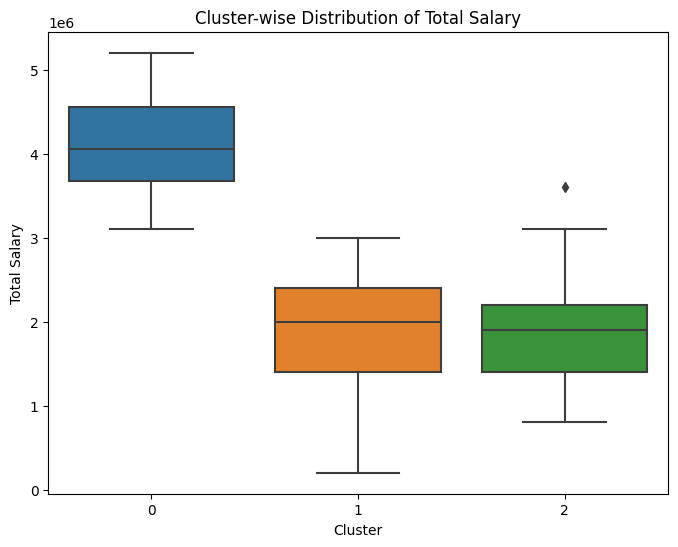

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Total Salary', data=df)
plt.title('Cluster-wise Distribution of Total Salary')
plt.xlabel('Cluster')
plt.ylabel('Total Salary')
plt.show()

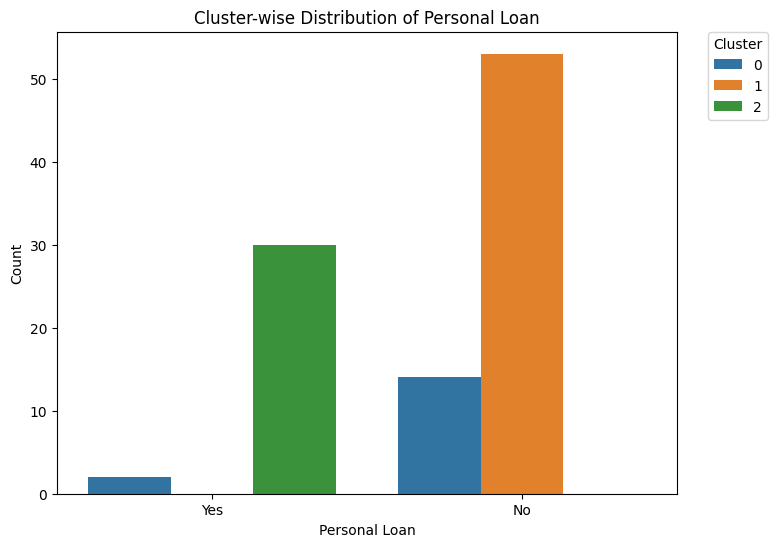

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Personal loan', hue='Cluster', data=df)
plt.title('Cluster-wise Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

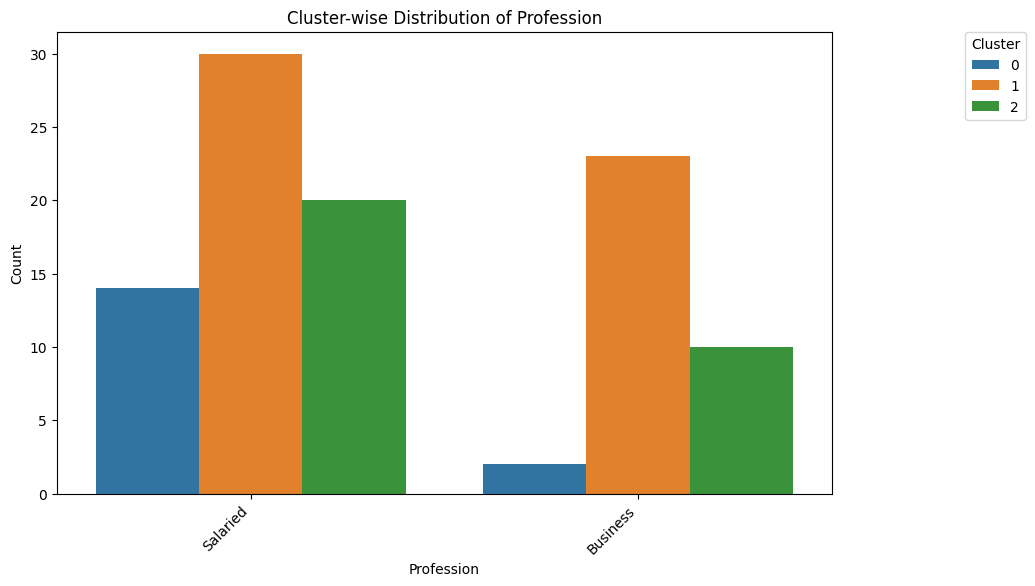

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Profession', hue='Cluster', data=df)
plt.title('Cluster-wise Distribution of Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.25, 1), borderaxespad=0.)
plt.xticks(rotation=45, ha='right')
plt.show()

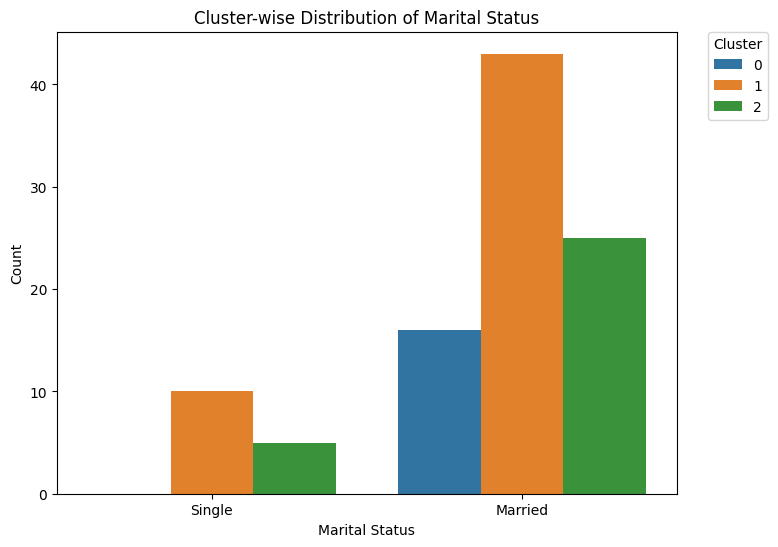

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marrital Status', hue='Cluster', data=df)
plt.title('Cluster-wise Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

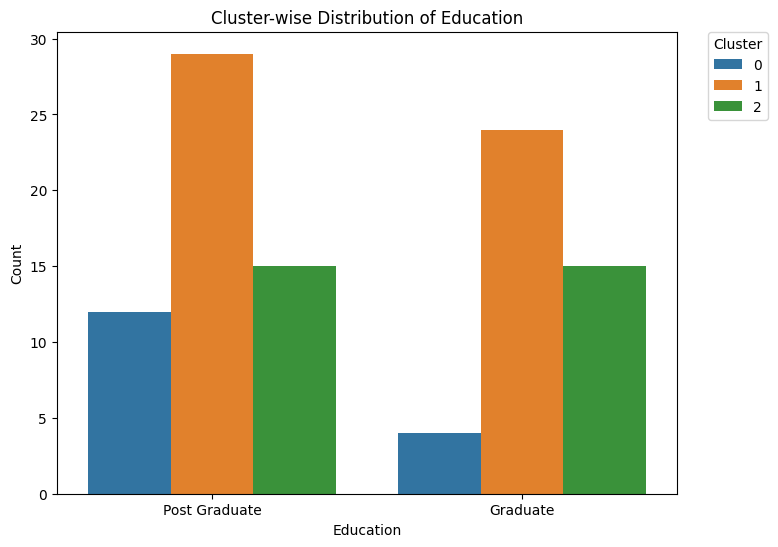

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Cluster', data=df)
plt.title('Cluster-wise Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

##1. Cluster 0:

**Description:** Customers in this segment have a relatively lower "Total Salary" and are less likely to have a "Personal loan."

**Characteristics:** These customers may be more budget-conscious and cautious about taking on additional financial commitments.

**Marketing Strategy:** Offer affordable EV options with flexible financing or lease options to attract price-sensitive customers. Highlight the cost savings and environmental benefits of EVs over time.
##2. Cluster 1:

**Description:** Customers in this segment have a moderate "Total Salary" and are more likely to have a "Personal loan."

**Characteristics:** These customers have a higher purchasing power and are willing to take on financing for their EV purchase.

**Marketing Strategy:** Promote mid-range and premium EV models with attractive financing and loan options. Emphasize the long-term cost-effectiveness and superior performance of high-end EVs.
##3. Cluster 2:

**Description:** Customers in this segment have a higher "Total Salary" and are also more likely to have a "Personal loan."

**Characteristics:** These customers are financially capable and willing to invest in EVs.

**Marketing Strategy:** Focus on luxury EV models with advanced features and top-notch technology. Highlight the exclusivity and status associated with owning high-end EVs. Offer premium after-sales services and perks for brand loyalty.

##Key Differences between Segments:

The primary difference between the segments lies in their financial capacity and willingness to take on a "Personal loan" for EV purchase.
1. Cluster 0 represents price-sensitive customers with lower salaries and a preference for no personal loans.
2. Cluster 1 comprises customers with moderate salaries who are open to financing options.
3. Cluster 2 consists of financially capable customers willing to take personal loans for higher-end EVs.
Key Similarities between Segments:

All segments show some interest in EVs, indicated by the presence of customers across clusters in the EV market.
Each segment contains a mix of customers with different professions, marital statuses, and educational backgrounds.
##Recommendations for Marketing Strategies:

1. For Cluster 0, emphasize affordability, low running costs, and environmental benefits. Provide entry-level EV options and financing plans tailored to their budget.
2. For Cluster 1, focus on value propositions, such as long-term savings, performance, and convenience. Offer mid-range EV models with appealing financing and lease options.
3. For Cluster 2, concentrate on exclusivity, luxury, and cutting-edge technology. Promote premium EVs with personalized financing solutions and premium customer experiences.